In [ ]:
#!rm data_engineering_cleaned.csv

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import os

In [2]:
# Read CSV file into a pandas DataFrame
df = pd.read_csv(("Resources/hawaii_measurements.csv"), dtype=object)
df = df.dropna(axis=0)
df.to_csv("clean_hawaii_measurements.csv", index=False)
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0,63
2,USC00519397,2010-01-03,0,74
3,USC00519397,2010-01-04,0,76
5,USC00519397,2010-01-07,0.06,70


In [3]:
# Read CSV file into a pandas DataFrame
df = pd.read_csv(("Resources/hawaii_stations.csv"), dtype=object)
clean_data = "clean_hawaii_stations.csv"
df.to_csv(clean_data, index=False)
df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.exc import IntegrityError

from flask import Flask
from flask_sqlalchemy import SQLAlchemy

In [25]:
# create classes Measurement and Station
Base = declarative_base()
class Measurement(Base):
    __tablename__ = "measurement"
    id = Column(Integer, primary_key=True)
    station_id = Column(Text)
    date = Column(Text)
    prcp = Column(Float)
    tobs = Column(Integer)
    
    def __repr__(self):
        return f"id={self.id}"
    
class Station(Base):
    __tablename__ = "station"
    id = Column(Integer, primary_key=True)
    station_id = Column(Text)
    name = Column(Text)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)
    
    def __repr__(self):
        return f"id={self.id}"


In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)

AttributeError: measurement

In [27]:
session.rollback()
session.query(Station).delete()
session.commit()
session.query(Measurement).delete()
session.commit()

results = session.query(Measurement).all()
results

[]

In [29]:
# add data to tables
stations_data = pd.read_csv("clean_hawaii_stations.csv")
measurements_data = pd.read_csv("clean_hawaii_measurements.csv")
for index, row in measurements_data.iterrows(): 
    record = Measurement(**{
                'id': index, 
#                 'station_id' : row['station'],
                'date' : row['date'],
                'prcp' : row['prcp'],
                'tobs' : row['tobs']
            })    
    try:
        session.add(record)
        session.commit()
        print(record.date, record.prcp, record.tobs)
    except IntegrityError:
        session.rollback()

for index, row in stations_data.iterrows():

    record = Station(**{
                'id': index, 
                'station_id' : row['station'],
                'name' : row['name'],
                'latitude' : row['latitude'],
                'longitude' : row['longitude'],
                'elevation' : row['elevation']
            })
    try:

        session.add(record)
        session.commit()
        print(record.station_id, record.name, record.latitude, record.longitude)
    except IntegrityError:
        session.rollback()


2010-01-02 0.0 63
2010-01-03 0.0 74
2010-01-04 0.0 76
2010-01-07 0.06 70
2010-01-08 0.0 64
2010-01-09 0.0 68
2010-01-10 0.0 73
2010-01-11 0.01 64
2010-01-12 0.0 61
2010-01-14 0.0 66
2010-01-15 0.0 65
2010-01-16 0.0 68
2010-01-17 0.0 64
2010-01-18 0.0 72
2010-01-19 0.0 66
2010-01-20 0.0 66
2010-01-21 0.0 69
2010-01-22 0.0 67
2010-01-23 0.0 67
2010-01-24 0.01 71
2010-01-25 0.0 67
2010-01-26 0.04 76
2010-01-27 0.12 68
2010-01-28 0.0 72
2010-01-31 0.03 67
2010-02-01 0.01 66
2010-02-04 0.01 69
2010-02-05 0.0 67
2010-02-06 0.0 67
2010-02-07 0.0 64
2010-02-08 0.0 69
2010-02-09 0.0 73
2010-02-11 0.0 73
2010-02-12 0.02 69
2010-02-13 0.01 69
2010-02-14 0.0 69
2010-02-15 0.0 71
2010-02-16 0.0 61
2010-02-17 0.0 69
2010-02-20 0.03 64
2010-02-21 0.0 65
2010-02-22 0.0 67
2010-02-23 0.0 68
2010-02-24 0.0 65
2010-02-25 0.0 76
2010-02-26 0.0 75
2010-02-28 0.0 66
2010-03-01 0.01 70
2010-03-02 0.0 72
2010-03-03 0.0 73
2010-03-04 0.12 70
2010-03-05 0.08 71
2010-03-06 0.03 72
2010-03-07 0.0 72
2010-03-08 0.

2011-06-02 0.0 78
2011-06-03 0.56 73
2011-06-04 0.89 70
2011-06-05 0.0 76
2011-06-06 0.0 77
2011-06-07 0.0 77
2011-06-08 0.03 77
2011-06-09 0.01 77
2011-06-10 0.0 78
2011-06-11 0.0 77
2011-06-12 0.0 77
2011-06-13 0.0 78
2011-06-14 0.0 78
2011-06-15 0.0 77
2011-06-17 0.0 78
2011-06-18 0.0 78
2011-06-19 0.05 75
2011-06-20 0.06 76
2011-06-21 0.07 76
2011-06-25 0.0 78
2011-06-26 0.0 76
2011-06-27 0.01 77
2011-06-28 0.01 75
2011-06-29 0.0 77
2011-07-01 0.05 77
2011-07-02 0.02 78
2011-07-03 0.0 78
2011-07-04 0.0 78
2011-07-05 0.01 78
2011-07-06 0.01 76
2011-07-07 0.01 76
2011-07-08 0.0 77
2011-07-09 0.03 77
2011-07-10 0.02 77
2011-07-11 0.0 78
2011-07-12 0.0 77
2011-07-13 0.15 73
2011-07-14 0.0 77
2011-07-15 0.0 79
2011-07-16 0.0 78
2011-07-17 0.04 77
2011-07-18 0.0 78
2011-07-19 0.0 78
2011-07-20 0.0 76
2011-07-21 0.03 77
2011-07-23 0.0 78
2011-07-24 0.0 77
2011-07-25 0.0 78
2011-07-26 0.0 78
2011-07-27 0.04 77
2011-07-28 0.09 77
2011-07-29 0.04 78
2011-07-30 0.12 80
2011-07-31 0.0 77
2011-

2012-09-21 0.08 77
2012-09-22 0.0 77
2012-09-23 0.04 76
2012-09-24 0.0 77
2012-09-25 0.0 76
2012-09-26 0.01 76
2012-09-27 0.02 78
2012-09-28 0.0 78
2012-09-29 0.0 77
2012-09-30 0.02 75
2012-10-01 0.0 78
2012-10-02 0.0 74
2012-10-03 0.0 75
2012-10-04 0.0 77
2012-10-05 0.0 73
2012-10-06 0.03 73
2012-10-07 0.0 76
2012-10-08 0.0 78
2012-10-09 0.0 75
2012-10-10 0.0 75
2012-10-11 0.0 80
2012-10-12 0.0 78
2012-10-13 0.0 79
2012-10-14 0.0 78
2012-10-15 0.02 78
2012-10-16 0.0 77
2012-10-17 0.0 72
2012-10-18 0.0 75
2012-10-19 0.0 77
2012-10-20 0.0 78
2012-10-21 0.0 77
2012-10-22 0.0 76
2012-10-23 0.0 78
2012-10-24 0.0 78
2012-10-25 0.0 76
2012-10-26 0.0 76
2012-10-27 0.0 74
2012-10-28 0.02 77
2012-10-29 0.04 77
2012-10-30 0.0 76
2012-10-31 0.02 78
2012-11-01 0.0 71
2012-11-02 0.0 70
2012-11-03 0.0 74
2012-11-04 0.0 71
2012-11-05 0.0 69
2012-11-06 0.0 76
2012-11-07 0.0 77
2012-11-08 0.0 77
2012-11-09 0.03 76
2012-11-10 0.0 75
2012-11-11 0.0 76
2012-11-12 0.0 77
2012-11-13 0.06 77
2012-11-14 0.0 7

2013-12-26 0.0 67
2013-12-27 0.0 74
2013-12-28 0.0 75
2013-12-29 0.0 75
2013-12-30 0.0 74
2013-12-31 0.0 67
2014-01-01 0.0 66
2014-01-02 0.0 75
2014-01-03 0.76 65
2014-01-04 0.0 69
2014-01-05 0.0 68
2014-01-06 0.0 71
2014-01-07 0.0 70
2014-01-08 0.0 71
2014-01-09 0.03 65
2014-01-12 0.35 69
2014-01-13 0.0 69
2014-01-14 0.43 70
2014-01-15 0.01 66
2014-01-16 0.25 69
2014-01-17 0.0 67
2014-01-18 0.0 66
2014-01-19 0.0 66
2014-01-20 0.0 64
2014-01-21 0.0 72
2014-01-22 0.35 69
2014-01-23 0.0 58
2014-01-24 0.0 59
2014-01-25 0.0 72
2014-01-26 0.0 74
2014-01-27 0.14 68
2014-01-28 0.02 70
2014-01-29 0.27 70
2014-01-30 0.04 65
2014-01-31 0.0 68
2014-02-01 0.22 74
2014-02-02 0.38 67
2014-02-03 0.0 69
2014-02-04 0.5 68
2014-02-05 0.23 73
2014-02-06 0.08 72
2014-02-07 0.03 77
2014-02-08 0.0 70
2014-02-09 0.0 71
2014-02-10 0.0 71
2014-02-11 0.0 69
2014-02-12 0.0 71
2014-02-13 0.0 67
2014-02-14 0.0 74
2014-02-15 0.01 73
2014-02-16 0.0 72
2014-02-17 0.35 72
2014-02-18 0.03 72
2014-02-19 0.0 71
2014-02-2

2015-04-11 0.0 75
2015-04-12 0.0 74
2015-04-13 0.0 76
2015-04-14 0.03 75
2015-04-15 0.01 75
2015-04-16 0.0 76
2015-04-17 0.06 77
2015-04-18 0.0 77
2015-04-19 0.0 75
2015-04-20 0.0 76
2015-04-21 0.0 76
2015-04-22 0.03 76
2015-04-23 0.0 78
2015-04-24 0.07 77
2015-04-25 0.0 74
2015-04-26 0.01 78
2015-04-27 0.06 81
2015-04-28 0.04 74
2015-04-29 0.02 77
2015-04-30 0.0 77
2015-05-01 0.06 75
2015-05-02 0.0 76
2015-05-03 0.0 76
2015-05-04 0.0 76
2015-05-05 0.05 77
2015-05-06 0.03 75
2015-05-07 0.01 77
2015-05-08 0.18 73
2015-05-09 0.05 76
2015-05-10 0.0 76
2015-05-11 0.0 76
2015-05-12 0.01 74
2015-05-13 0.0 76
2015-05-14 0.0 76
2015-05-15 0.13 74
2015-05-16 0.0 76
2015-05-17 0.0 77
2015-05-18 0.0 77
2015-05-19 0.0 76
2015-05-20 0.0 76
2015-05-21 0.0 77
2015-05-22 0.0 75
2015-05-23 0.07 75
2015-05-24 0.0 73
2015-05-25 0.0 74
2015-05-26 0.0 75
2015-05-27 0.0 76
2015-05-28 0.0 77
2015-05-29 0.0 78
2015-05-30 0.0 78
2015-05-31 0.0 77
2015-06-01 0.0 78
2015-06-02 0.0 78
2015-06-03 0.0 79
2015-06-04

2016-07-05 0.02 78
2016-07-06 0.02 78
2016-07-07 0.01 80
2016-07-08 0.0 80
2016-07-09 0.0 80
2016-07-10 0.02 78
2016-07-11 0.0 72
2016-07-12 0.0 80
2016-07-13 0.0 79
2016-07-14 0.0 79
2016-07-15 0.46 78
2016-07-16 0.03 78
2016-07-17 0.0 78
2016-07-18 1.25 76
2016-07-19 0.03 78
2016-07-20 0.0 78
2016-07-21 0.04 78
2016-07-22 0.02 76
2016-07-23 0.0 78
2016-07-24 0.13 79
2016-07-25 4.2 78
2016-07-26 0.0 80
2016-07-27 0.0 80
2016-07-28 0.0 80
2016-07-29 0.0 79
2016-07-30 0.0 78
2016-07-31 0.06 76
2016-08-01 0.08 77
2016-08-02 0.05 78
2016-08-03 0.0 80
2016-08-04 0.04 80
2016-08-05 0.01 80
2016-08-06 0.0 80
2016-08-07 0.39 77
2016-08-08 0.02 81
2016-08-09 0.0 80
2016-08-10 0.0 80
2016-08-11 0.0 80
2016-08-12 0.0 79
2016-08-13 0.0 79
2016-08-14 0.0 79
2016-08-15 0.0 79
2016-08-16 0.0 80
2016-08-17 0.0 78
2016-08-18 0.0 80
2016-08-19 0.04 77
2016-08-20 0.0 80
2016-08-21 0.12 76
2016-08-22 0.4 77
2016-08-23 0.0 81
2016-08-24 0.08 79
2016-08-25 0.08 80
2016-08-26 0.0 79
2016-08-27 0.0 77
2016-0

2010-02-26 0.0 74
2010-02-27 0.0 70
2010-02-28 0.0 70
2010-03-01 0.04 70
2010-03-02 0.0 71
2010-03-03 0.0 71
2010-03-04 0.33 68
2010-03-05 0.21 69
2010-03-06 0.09 71
2010-03-07 0.0 70
2010-03-08 0.34 70
2010-03-09 0.05 68
2010-03-10 0.04 70
2010-03-11 0.09 71
2010-03-12 0.03 71
2010-03-13 0.0 70
2010-03-14 0.0 72
2010-03-15 0.16 70
2010-03-16 0.16 71
2010-03-17 0.4 66
2010-03-18 0.44 66
2010-03-19 0.08 69
2010-03-20 0.01 69
2010-03-21 0.0 71
2010-03-22 0.0 68
2010-03-23 0.0 67
2010-03-24 0.03 72
2010-03-25 0.01 72
2010-03-26 0.02 71
2010-03-27 0.01 71
2010-03-28 0.01 71
2010-03-29 0.0 72
2010-03-30 0.02 73
2010-03-31 0.02 71
2010-04-01 0.01 73
2010-04-02 0.02 71
2010-04-03 0.03 72
2010-04-04 0.13 71
2010-04-05 0.19 71
2010-04-06 0.07 69
2010-04-07 0.51 70
2010-04-08 0.0 73
2010-04-09 0.24 69
2010-04-10 0.03 72
2010-04-11 0.03 69
2010-04-12 0.01 71
2010-04-13 0.06 71
2010-04-14 0.07 69
2010-04-15 0.0 69
2010-04-16 0.03 67
2010-04-17 0.02 69
2010-04-18 0.0 70
2010-04-19 0.01 71
2010-04-2

2011-06-13 0.16 73
2011-06-14 0.0 75
2011-06-15 0.0 75
2011-06-16 0.06 74
2011-06-17 0.0 74
2011-06-18 0.02 75
2011-06-19 0.09 74
2011-06-20 0.03 73
2011-06-21 0.54 72
2011-06-22 0.22 74
2011-06-23 0.03 72
2011-06-24 0.21 75
2011-06-25 0.0 76
2011-06-26 0.04 74
2011-06-27 0.03 74
2011-06-28 0.1 74
2011-06-29 0.0 74
2011-06-30 0.0 74
2011-07-01 0.09 74
2011-07-02 0.0 75
2011-07-03 0.04 76
2011-07-04 0.0 74
2011-07-05 0.03 74
2011-07-06 0.02 76
2011-07-07 0.07 73
2011-07-08 0.1 75
2011-07-09 0.05 75
2011-07-10 0.02 76
2011-07-11 0.01 74
2011-07-12 0.0 74
2011-07-13 0.0 74
2011-07-14 0.06 73
2011-07-15 0.0 75
2011-07-16 0.0 75
2011-07-17 0.15 75
2011-07-18 0.04 74
2011-07-19 0.0 74
2011-07-20 0.1 71
2011-07-21 0.04 75
2011-07-22 0.08 74
2011-07-23 0.0 75
2011-07-24 0.1 70
2011-07-25 0.22 74
2011-07-26 0.01 74
2011-07-27 0.04 75
2011-07-28 0.03 75
2011-07-29 0.15 74
2011-07-30 0.61 75
2011-07-31 0.0 76
2011-08-01 0.01 74
2011-08-02 0.0 74
2011-08-03 0.02 75
2011-08-04 0.03 74
2011-08-05 0.

2012-09-17 0.04 74
2012-09-18 0.0 73
2012-09-19 0.25 72
2012-09-20 0.55 71
2012-09-23 0.02 74
2012-09-24 0.07 75
2012-09-25 0.01 74
2012-09-26 0.0 74
2012-09-27 0.05 80
2012-09-28 0.01 75
2012-09-29 0.01 74
2012-09-30 0.0 73
2012-10-01 0.01 70
2012-10-02 0.0 72
2012-10-03 0.0 72
2012-10-04 0.0 73
2012-10-05 0.0 70
2012-10-06 0.0 71
2012-10-07 0.0 75
2012-10-08 0.04 75
2012-10-09 0.0 74
2012-10-10 0.0 72
2012-10-11 0.22 75
2012-10-12 0.0 74
2012-10-13 0.0 75
2012-10-14 0.07 74
2012-10-15 0.09 75
2012-10-16 0.07 73
2012-10-17 0.0 69
2012-10-18 0.0 70
2012-10-19 0.08 74
2012-10-20 0.0 74
2012-10-21 0.0 75
2012-10-22 0.0 75
2012-10-23 0.02 75
2012-10-24 0.01 73
2012-10-25 0.16 73
2012-10-26 0.0 72
2012-10-27 0.0 71
2012-10-28 0.02 74
2012-10-29 0.04 73
2012-10-30 0.01 74
2012-10-31 0.03 72
2012-11-01 0.0 67
2012-11-02 0.0 67
2012-11-03 0.0 74
2012-11-04 0.0 68
2012-11-05 0.0 69
2012-11-06 0.0 74
2012-11-07 0.07 74
2012-11-08 0.03 73
2012-11-09 0.03 74
2012-11-10 0.02 74
2012-11-11 0.0 74
2

2013-12-22 0.02 69
2013-12-23 0.02 72
2013-12-24 0.01 73
2013-12-25 0.02 73
2013-12-26 0.02 72
2013-12-27 0.0 73
2013-12-28 0.02 74
2013-12-29 0.03 73
2013-12-30 0.0 72
2013-12-31 0.09 68
2014-01-01 0.0 68
2014-01-02 0.0 75
2014-01-03 1.59 67
2014-01-04 0.01 71
2014-01-05 0.02 69
2014-01-06 0.19 66
2014-01-07 0.01 71
2014-01-08 0.0 71
2014-01-09 0.12 66
2014-01-10 0.0 72
2014-01-11 0.14 68
2014-01-12 0.0 79
2014-01-13 0.0 77
2014-01-14 0.89 72
2014-01-15 0.19 68
2014-01-16 0.04 72
2014-01-17 0.0 69
2014-01-18 0.03 67
2014-01-19 0.0 67
2014-01-20 0.02 66
2014-01-21 0.0 72
2014-01-22 0.65 71
2014-01-23 0.0 65
2014-01-24 0.0 62
2014-01-25 0.0 67
2014-01-26 0.0 75
2014-01-27 0.31 68
2014-01-28 0.43 70
2014-01-29 0.51 69
2014-01-30 0.2 66
2014-01-31 0.0 68
2014-02-01 0.12 74
2014-02-02 0.27 68
2014-02-03 0.0 69
2014-02-04 0.88 67
2014-02-05 0.39 71
2014-02-06 0.05 72
2014-02-07 0.06 70
2014-02-08 1.1 68
2014-02-09 0.36 72
2014-02-10 0.01 72
2014-02-11 0.0 69
2014-02-12 0.0 72
2014-02-13 0.0

2015-04-24 0.04 76
2015-04-25 0.01 74
2015-04-26 0.0 75
2015-04-27 0.17 73
2015-04-28 0.09 73
2015-04-29 0.09 75
2015-04-30 0.03 76
2015-05-01 0.05 74
2015-05-02 0.0 73
2015-05-05 0.02 75
2015-05-06 0.0 74
2015-05-07 0.0 75
2015-05-08 0.04 76
2015-05-09 0.13 74
2015-05-10 0.05 73
2015-05-11 0.02 74
2015-05-12 0.0 73
2015-05-13 0.0 72
2015-05-14 0.1 73
2015-05-15 0.02 72
2015-05-16 0.02 76
2015-05-17 0.01 73
2015-05-18 0.27 73
2015-05-19 0.02 73
2015-05-20 0.03 72
2015-05-21 0.06 68
2015-05-22 0.0 68
2015-05-23 0.8 68
2015-05-24 0.0 72
2015-05-25 0.01 72
2015-05-26 0.08 67
2015-05-27 0.07 67
2015-05-28 1.29 68
2015-05-29 0.01 68
2015-05-30 0.0 70
2015-05-31 0.34 74
2015-06-04 0.27 72
2015-06-05 0.0 70
2015-06-06 0.0 76
2015-06-07 0.0 78
2015-06-08 0.1 72
2015-06-09 0.05 74
2015-06-10 0.07 74
2015-06-11 0.1 72
2015-06-12 0.0 71
2015-06-13 0.0 79
2015-06-14 0.07 79
2015-06-15 0.0 76
2015-06-16 0.14 75
2015-06-17 0.25 72
2015-06-18 0.14 74
2015-06-19 0.02 76
2015-06-20 0.04 76
2015-06-21 0

2016-08-31 0.1 77
2016-09-01 0.0 79
2016-09-02 0.02 78
2016-09-03 0.07 77
2016-09-04 0.03 75
2016-09-05 0.11 78
2016-09-06 0.05 74
2016-09-07 0.1 75
2016-09-08 0.22 77
2016-09-09 0.01 76
2016-09-10 0.01 76
2016-09-11 0.18 76
2016-09-12 0.04 76
2016-09-13 0.37 76
2016-09-14 0.9 76
2016-09-15 0.12 78
2016-09-16 0.01 78
2016-09-17 0.04 78
2016-09-18 0.0 78
2016-09-19 0.01 75
2016-09-20 0.09 78
2016-09-21 0.06 76
2016-09-22 0.09 77
2016-09-23 0.15 76
2016-09-24 0.0 79
2016-09-25 0.02 77
2016-09-26 0.06 77
2016-09-27 0.12 77
2016-09-28 0.08 77
2016-09-29 0.49 76
2016-09-30 0.31 77
2016-10-01 0.14 75
2016-10-02 0.02 77
2016-10-03 0.04 78
2016-10-04 0.0 78
2016-10-05 0.0 77
2016-10-06 0.05 76
2016-10-07 0.0 78
2016-10-08 0.0 76
2016-10-09 0.0 77
2016-10-10 0.0 75
2016-10-11 0.02 77
2016-10-12 0.03 75
2016-10-13 0.0 78
2016-10-14 0.0 77
2016-10-15 0.0 76
2016-10-16 0.0 75
2016-10-17 0.03 77
2016-10-18 0.05 77
2016-10-19 0.06 77
2016-10-20 0.0 76
2016-10-21 0.15 76
2016-10-22 0.1 77
2016-10-23 

2010-08-02 0.11 73
2010-08-03 0.04 71
2010-08-04 0.05 74
2010-08-05 0.29 72
2010-08-06 0.0 75
2010-08-07 0.09 76
2010-08-08 0.07 73
2010-08-09 0.04 74
2010-08-10 0.0 74
2010-08-11 0.01 73
2010-08-12 0.01 75
2010-08-13 0.01 76
2010-08-14 0.0 75
2010-08-15 0.0 75
2010-08-16 0.14 71
2010-08-17 0.0 73
2010-08-18 0.05 75
2010-08-19 0.13 76
2010-08-20 0.01 75
2010-08-21 0.0 74
2010-08-22 0.0 72
2010-08-23 0.0 77
2010-08-24 0.0 75
2010-08-25 0.02 75
2010-08-26 0.08 71
2010-08-27 0.15 75
2010-08-28 0.01 75
2010-08-29 0.1 74
2010-08-30 0.0 75
2010-08-31 0.0 73
2010-09-01 0.01 72
2010-09-02 0.06 71
2010-09-03 0.11 74
2010-09-04 0.0 76
2010-09-05 0.11 75
2010-09-06 0.03 77
2010-09-07 0.1 75
2010-09-08 0.05 75
2010-09-09 0.04 75
2010-09-10 0.01 75
2010-09-11 0.0 76
2010-09-12 0.0 76
2010-09-13 0.0 75
2010-09-14 0.04 75
2010-09-15 0.01 74
2010-09-16 0.02 76
2010-09-17 0.03 75
2010-09-18 0.0 75
2010-09-19 0.06 74
2010-09-20 0.03 74
2010-09-21 0.01 74
2010-09-22 0.41 71
2010-09-23 0.57 75
2010-09-24 

2012-04-14 0.0 72
2012-04-15 0.02 72
2012-04-16 0.0 73
2012-04-17 0.0 71
2012-04-18 0.0 69
2012-04-19 0.0 70
2012-04-20 0.0 70
2012-04-24 0.0 69
2012-04-25 0.07 67
2012-04-26 0.01 70
2012-04-27 0.07 71
2012-06-21 0.08 75
2012-06-22 0.01 75
2012-06-25 0.12 77
2012-06-26 0.03 75
2012-06-27 0.2 74
2012-06-28 0.0 75
2012-06-29 0.23 76
2012-06-30 0.02 78
2012-07-01 0.02 78
2012-07-02 0.0 76
2012-07-03 0.05 75
2012-07-04 0.19 75
2012-07-05 0.11 76
2012-07-06 0.04 75
2012-07-07 0.1 77
2012-07-08 0.0 78
2012-07-09 0.01 77
2012-07-10 0.03 74
2012-07-11 0.0 76
2012-07-12 0.02 71
2012-07-13 0.12 77
2012-07-14 0.03 79
2012-07-15 0.13 72
2012-07-16 0.17 76
2012-07-17 0.1 77
2012-07-18 0.05 77
2012-07-19 0.16 76
2012-07-20 0.05 73
2012-07-21 0.12 79
2012-07-22 0.0 79
2012-07-23 0.01 77
2012-07-24 0.0 76
2012-07-25 0.0 79
2012-07-26 0.01 77
2012-07-27 0.11 77
2012-07-28 0.21 79
2012-07-29 0.1 77
2012-07-30 0.0 77
2012-07-31 0.1 76
2012-08-14 0.06 75
2012-08-15 0.01 76
2012-08-16 0.02 77
2012-08-17 0.

2014-05-14 0.01 72
2014-05-15 0.0 77
2014-05-16 0.37 75
2014-05-17 0.01 76
2014-05-20 0.07 77
2014-05-21 0.0 77
2014-05-22 0.04 77
2014-05-23 0.0 78
2014-05-27 0.9 77
2014-05-28 0.09 77
2014-05-29 0.02 78
2014-05-30 0.0 77
2014-06-02 0.02 78
2014-06-03 0.0 77
2014-06-04 0.0 77
2014-06-05 0.0 76
2014-06-06 0.13 75
2014-06-07 0.04 79
2014-06-10 0.16 73
2014-06-11 0.17 76
2014-06-12 0.0 78
2014-06-13 0.0 77
2014-06-14 0.0 78
2014-06-17 0.39 75
2014-06-18 0.08 76
2014-06-19 0.14 77
2014-06-20 0.07 74
2014-06-21 0.11 78
2014-06-24 0.03 77
2014-06-25 0.1 74
2014-06-26 0.08 74
2014-06-27 0.08 78
2014-06-30 0.04 79
2014-07-01 0.0 76
2014-07-02 0.03 79
2014-07-03 0.05 78
2014-07-04 0.03 77
2014-07-05 0.01 78
2014-07-06 0.05 79
2014-07-07 0.0 77
2014-07-08 0.02 76
2014-07-09 0.09 78
2014-07-10 0.03 78
2014-07-11 0.0 75
2014-07-12 0.01 81
2014-07-13 0.14 78
2014-07-14 0.15 78
2014-07-15 0.01 78
2014-07-16 0.32 78
2014-07-17 0.04 78
2014-07-18 0.09 79
2014-07-19 0.0 80
2014-07-20 11.53 76
2014-07-

2016-01-28 0.0 77
2016-01-29 0.13 76
2016-01-30 0.0 76
2016-02-02 0.2 71
2016-02-04 0.0 76
2016-02-05 0.0 74
2016-02-06 0.0 73
2016-02-07 0.56 72
2016-02-08 0.0 70
2016-02-09 0.0 70
2016-02-10 0.0 63
2016-02-11 0.0 74
2016-02-12 0.0 78
2016-02-13 0.0 76
2016-02-14 0.0 79
2016-02-15 0.23 77
2016-02-16 0.03 75
2016-02-17 0.13 72
2016-02-18 0.0 74
2016-02-19 0.09 72
2016-02-20 0.09 74
2016-02-23 0.0 71
2016-02-24 0.0 70
2016-02-25 0.0 73
2016-02-26 0.36 75
2016-02-27 0.0 77
2016-02-28 0.0 76
2016-02-29 0.05 73
2016-03-01 0.07 73
2016-03-02 0.0 70
2016-03-03 0.0 71
2016-03-04 0.0 72
2016-03-05 0.0 76
2016-03-06 0.0 76
2016-03-07 0.0 78
2016-03-08 0.0 78
2016-03-09 0.22 68
2016-03-10 0.0 69
2016-03-11 0.01 72
2016-03-12 0.0 73
2016-03-15 1.08 71
2016-03-16 0.06 71
2016-03-17 0.0 69
2016-03-18 0.13 71
2016-03-19 0.03 72
2016-03-20 0.0 75
2016-03-21 0.0 74
2016-03-22 0.0 76
2016-03-23 0.72 74
2016-03-24 0.0 76
2016-03-25 0.04 75
2016-03-26 0.02 75
2016-03-29 0.0 77
2016-03-30 0.0 68
2016-03-3

2010-06-08 0.0 79
2010-06-09 0.0 79
2010-06-10 0.0 77
2010-06-15 0.0 76
2010-06-16 0.0 77
2010-06-17 0.0 76
2010-06-18 0.05 73
2010-06-21 0.0 76
2010-06-22 0.02 77
2010-06-23 0.0 77
2010-06-24 0.02 78
2010-06-25 0.1 77
2010-06-28 0.0 76
2010-06-29 0.0 78
2010-06-30 0.0 78
2010-07-01 0.0 73
2010-07-02 0.02 74
2010-07-07 0.03 76
2010-07-08 0.05 75
2010-07-09 0.08 73
2010-07-14 0.0 74
2010-07-15 0.0 74
2010-07-16 0.0 78
2010-07-19 0.0 72
2010-07-20 0.07 74
2010-07-21 0.0 78
2010-07-22 0.0 77
2010-07-23 0.0 76
2010-08-02 0.0 74
2010-08-03 0.23 73
2010-08-04 0.04 73
2010-08-05 0.09 73
2010-08-06 0.02 75
2010-08-09 0.0 77
2010-08-10 0.0 79
2010-08-11 0.0 74
2010-08-12 0.05 75
2010-08-13 0.0 76
2010-08-16 0.0 75
2010-08-17 0.0 75
2010-08-18 0.0 75
2010-08-19 0.0 79
2010-08-23 0.0 77
2010-08-24 0.0 74
2010-08-25 0.04 74
2010-08-26 0.04 75
2010-08-27 0.06 76
2010-08-30 0.0 74
2010-08-31 0.0 75
2010-09-01 0.0 73
2010-09-02 0.05 74
2010-09-03 0.08 75
2010-09-07 0.0 77
2010-09-08 0.0 75
2010-09-09

2014-04-04 0.0 74
2014-04-08 0.0 71
2014-04-09 0.0 70
2014-04-10 0.0 68
2014-04-11 0.0 72
2014-04-16 0.06 74
2014-04-22 0.09 77
2014-04-23 0.0 77
2014-04-24 0.0 76
2014-05-02 0.0 78
2014-05-06 0.72 76
2014-05-07 0.03 76
2014-05-14 0.0 75
2014-05-15 0.0 76
2014-05-16 0.0 78
2014-05-20 0.01 78
2014-05-21 0.26 77
2014-05-22 0.0 80
2014-05-23 0.0 77
2014-06-03 0.0 79
2014-06-10 0.0 79
2014-06-13 0.0 79
2014-06-17 0.2 79
2014-06-18 0.0 78
2014-06-19 0.01 80
2014-06-20 0.14 81
2014-06-27 0.0 81
2014-07-15 0.0 82
2014-07-16 0.0 81
2014-07-17 0.02 81
2014-07-18 0.0 81
2014-07-25 0.0 80
2014-07-29 0.0 81
2014-07-30 0.0 83
2014-08-12 0.0 81
2014-08-13 0.02 80
2014-08-14 0.0 80
2014-08-19 0.0 76
2014-08-20 0.0 80
2014-08-21 0.0 82
2014-08-22 0.0 80
2014-08-27 0.05 77
2014-09-02 0.0 83
2014-09-03 0.0 83
2014-09-04 0.0 80
2014-09-09 0.0 83
2014-09-10 0.0 84
2014-09-11 0.0 81
2014-09-12 0.0 80
2014-09-18 0.0 82
2014-09-19 0.12 81
2014-09-22 0.0 80
2014-09-23 0.02 82
2014-09-30 0.0 83
2014-10-01 0.0 

2012-01-12 0.1 74
2012-01-14 0.0 58
2012-01-17 0.26 69
2012-01-18 1.26 73
2012-01-19 0.0 78
2012-01-20 0.0 78
2012-01-24 0.0 77
2012-01-25 0.0 74
2012-01-26 0.06 71
2012-01-27 1.03 72
2012-01-28 0.05 73
2012-01-29 0.05 71
2012-02-10 0.0 71
2012-02-15 0.0 74
2012-03-01 0.0 71
2012-03-03 0.22 65
2012-03-04 2.7 65
2012-03-05 0.92 62
2012-04-05 0.3 69
2012-05-18 0.3 76
2012-05-25 0.2 77
2012-05-28 0.15 74
2012-06-01 0.03 75
2012-07-20 0.05 72
2012-07-22 0.4 78
2012-07-23 0.03 79
2012-07-24 0.22 75
2012-07-25 0.2 77
2012-07-31 0.02 76
2012-08-01 0.0 79
2012-08-03 0.0 77
2012-08-06 0.26 78
2012-10-05 0.0 74
2012-10-11 0.08 78
2012-10-12 0.01 80
2012-10-16 0.11 77
2012-10-17 0.0 75
2012-10-18 0.02 76
2012-11-16 0.45 74
2012-11-27 0.0 71
2013-01-10 0.0 74
2013-01-24 0.3 67
2013-01-25 0.9 74
2013-02-07 0.0 72
2013-02-08 0.05 73
2013-02-15 0.0 70
2013-04-03 0.05 70
2013-04-05 0.0 73
2013-08-05 0.01 79
2013-08-06 0.02 80
2013-08-07 0.0 80
2013-08-08 0.0 72
2013-08-09 0.0 80
2013-08-19 0.0 78
2013

2011-02-07 0.95 67
2011-02-08 0.18 71
2011-02-09 0.0 74
2011-02-10 0.04 69
2011-02-11 0.29 68
2011-02-12 1.82 72
2011-02-13 0.71 76
2011-02-15 0.0 73
2011-02-16 0.0 73
2011-02-17 0.0 72
2011-02-18 0.01 76
2011-02-19 0.0 76
2011-02-20 0.3 73
2011-02-21 0.02 76
2011-02-22 0.01 73
2011-02-23 0.01 73
2011-02-24 1.44 68
2011-02-25 0.0 66
2011-02-26 0.05 77
2011-02-27 0.0 75
2011-02-28 0.02 70
2011-03-01 0.18 67
2011-03-02 0.01 72
2011-03-03 0.06 71
2011-03-04 1.7 72
2011-03-05 0.22 69
2011-03-06 0.27 74
2011-03-07 0.03 73
2011-03-08 0.01 73
2011-03-09 0.9 70
2011-03-10 0.27 72
2011-03-11 0.2 71
2011-03-12 0.01 75
2011-03-13 0.0 77
2011-03-14 0.0 70
2011-03-15 0.0 73
2011-03-16 0.0 74
2011-03-17 0.07 73
2011-03-18 0.05 72
2011-03-19 0.08 73
2011-03-20 0.23 74
2011-03-21 0.0 74
2011-03-22 0.17 73
2011-03-23 0.0 74
2011-03-24 0.19 76
2011-03-25 0.02 76
2011-03-26 0.0 74
2011-03-27 0.0 74
2011-03-29 0.0 73
2011-03-30 0.0 73
2011-03-31 0.0 73
2011-04-01 0.07 73
2011-04-02 0.0 79
2011-04-03 0.0 7

2012-05-28 0.0 78
2012-05-29 0.0 74
2012-05-30 0.0 73
2012-05-31 0.15 73
2012-06-01 0.0 74
2012-06-02 0.0 75
2012-06-03 0.0 77
2012-06-04 0.0 75
2012-06-05 0.0 74
2012-06-06 0.12 75
2012-06-07 0.0 74
2012-06-08 0.0 75
2012-06-09 0.0 73
2012-06-10 0.0 75
2012-06-11 0.0 76
2012-06-12 0.01 76
2012-06-13 0.01 76
2012-06-14 0.0 79
2012-06-15 0.0 74
2012-06-16 0.0 78
2012-06-17 0.0 80
2012-06-18 0.0 75
2012-06-19 0.25 72
2012-06-20 0.25 72
2012-06-21 0.0 74
2012-06-22 0.0 78
2012-06-23 0.1 76
2012-06-24 0.0 77
2012-06-25 0.51 72
2012-06-26 0.19 72
2012-06-27 0.15 73
2012-06-28 0.0 75
2012-06-29 0.06 79
2012-06-30 0.0 81
2012-07-01 0.0 78
2012-07-02 0.0 76
2012-07-03 0.2 76
2012-07-04 0.0 75
2012-07-05 0.13 77
2012-07-06 0.07 79
2012-07-07 0.07 76
2012-07-08 0.01 81
2012-07-09 0.0 75
2012-07-10 0.0 79
2012-07-11 0.0 75
2012-07-12 0.0 74
2012-07-13 0.0 78
2012-07-14 0.02 82
2012-07-15 0.0 80
2012-07-16 0.01 76
2012-07-17 0.02 78
2012-07-18 0.02 77
2012-07-19 0.07 74
2012-07-20 0.05 74
2012-07-

2013-09-14 0.09 81
2013-09-15 0.15 78
2013-09-16 0.02 78
2013-09-17 0.07 76
2013-09-18 0.06 78
2013-09-19 0.04 78
2013-09-20 0.0 78
2013-09-23 0.0 81
2013-09-26 0.49 78
2013-09-27 0.02 78
2013-09-28 0.0 78
2013-09-29 0.07 79
2013-09-30 0.13 78
2013-10-01 0.0 78
2013-10-02 0.0 77
2013-10-03 0.0 76
2013-10-04 0.0 77
2013-10-07 0.0 77
2013-10-08 0.0 77
2013-10-09 0.0 78
2013-10-10 0.07 78
2013-10-11 0.0 75
2013-10-12 0.06 76
2013-10-13 0.0 72
2013-10-14 0.68 74
2013-10-15 0.0 74
2013-10-16 0.0 75
2013-10-17 0.0 78
2013-10-18 0.05 69
2013-10-19 0.0 66
2013-10-20 0.01 69
2013-10-21 0.0 68
2013-10-22 0.0 74
2013-10-23 0.0 81
2013-10-24 0.11 73
2013-10-25 0.0 76
2013-10-26 0.0 79
2013-10-29 0.0 76
2013-10-30 0.0 76
2013-10-31 0.0 74
2013-11-01 0.0 76
2013-11-02 0.07 75
2013-11-03 0.0 78
2013-11-04 0.0 82
2013-11-05 0.0 74
2013-11-06 0.05 73
2013-11-07 0.2 74
2013-11-08 0.02 74
2013-11-09 0.04 74
2013-11-10 4.76 73
2013-11-11 0.03 76
2013-11-12 0.24 62
2013-11-13 0.0 64
2013-11-14 0.05 72
2013

2015-03-08 0.0 69
2015-03-09 0.03 63
2015-03-10 0.01 65
2015-03-11 0.0 72
2015-03-14 0.0 68
2015-03-15 0.0 67
2015-03-16 0.0 61
2015-03-17 0.0 66
2015-03-18 0.0 60
2015-03-19 0.0 65
2015-03-20 0.0 72
2015-03-21 0.12 75
2015-03-22 0.1 74
2015-03-23 0.0 73
2015-03-26 0.0 70
2015-03-27 0.0 74
2015-03-28 0.0 74
2015-03-29 1.94 75
2015-03-30 0.02 76
2015-03-31 0.15 72
2015-04-01 0.25 78
2015-04-02 0.0 77
2015-04-03 0.0 77
2015-04-04 0.0 77
2015-04-05 0.0 80
2015-04-06 0.0 73
2015-04-07 0.0 75
2015-04-08 0.02 73
2015-04-09 0.0 73
2015-04-12 0.0 76
2015-04-13 0.0 76
2015-04-14 0.07 74
2015-04-15 0.02 76
2015-04-16 0.0 74
2015-04-17 0.07 75
2015-04-18 0.0 76
2015-04-19 0.03 74
2015-04-20 0.0 74
2015-04-21 0.0 76
2015-04-22 0.0 69
2015-04-23 0.15 75
2015-04-24 0.25 75
2015-04-25 0.05 81
2015-04-26 0.02 81
2015-04-27 3.62 73
2015-04-30 0.0 75
2015-05-01 0.05 75
2015-05-02 0.0 75
2015-05-03 0.0 74
2015-05-04 0.0 75
2015-05-05 0.0 75
2015-05-06 0.0 75
2015-05-07 0.0 77
2015-05-08 0.13 72
2015-05-0

2016-09-07 0.11 76
2016-09-08 0.01 79
2016-09-09 0.23 77
2016-09-10 0.14 78
2016-09-11 0.12 83
2016-09-12 0.15 78
2016-09-13 0.46 77
2016-09-14 1.19 77
2016-09-15 0.17 79
2016-09-16 0.01 78
2016-09-17 0.0 81
2016-09-18 0.04 81
2016-09-19 0.05 78
2016-09-20 0.04 77
2016-09-21 0.0 79
2016-09-22 0.01 79
2016-09-23 0.0 80
2016-09-24 0.0 83
2016-09-25 0.0 82
2016-09-26 0.34 78
2016-09-27 0.05 78
2016-09-28 0.0 78
2016-09-29 0.18 82
2016-09-30 0.15 78
2016-10-01 0.07 79
2016-10-02 0.0 81
2016-10-03 0.0 79
2016-10-04 0.0 80
2016-10-05 0.0 80
2016-10-06 0.0 80
2016-10-07 0.0 79
2016-10-08 0.0 82
2016-10-09 0.0 80
2016-10-10 0.0 78
2016-10-11 0.0 81
2016-10-12 0.0 81
2016-10-13 0.0 79
2016-10-14 0.0 80
2016-10-15 0.0 79
2016-10-16 0.0 81
2016-10-17 0.12 80
2016-10-18 0.02 80
2016-10-19 0.0 78
2016-10-22 0.0 80
2016-10-23 0.0 81
2016-10-24 0.0 75
2016-10-25 0.12 77
2016-10-26 0.02 78
2016-10-27 0.08 78
2016-10-28 0.06 78
2016-10-29 0.01 78
2016-10-30 0.0 79
2016-10-31 0.13 78
2016-11-01 0.01 79


2010-07-13 0.62 69
2010-07-14 0.2 70
2010-07-15 0.14 70
2010-07-16 0.01 76
2010-07-17 0.04 72
2010-07-18 0.31 74
2010-07-19 0.02 73
2010-07-20 0.1 74
2010-07-21 0.0 72
2010-07-22 0.19 74
2010-07-23 0.07 72
2010-07-24 0.35 74
2010-07-25 0.0 74
2010-07-26 0.0 72
2010-07-27 0.01 69
2010-07-28 0.16 71
2010-07-29 0.02 72
2010-07-30 0.0 74
2010-07-31 0.04 77
2010-08-01 0.14 72
2010-08-02 0.27 71
2010-08-03 0.02 74
2010-08-04 0.28 74
2010-08-05 0.11 70
2010-08-06 0.16 73
2010-08-07 0.17 78
2010-08-08 0.12 74
2010-08-09 0.12 72
2010-08-10 0.0 74
2010-08-11 0.0 74
2010-08-12 0.02 74
2010-08-13 0.08 72
2010-08-14 0.0 78
2010-08-15 0.0 76
2010-08-16 0.21 80
2010-08-17 0.31 79
2010-08-18 0.05 78
2010-08-19 0.43 78
2010-08-20 0.02 78
2010-08-21 0.0 77
2010-08-22 0.0 75
2010-08-23 0.0 75
2010-08-24 0.0 80
2010-08-25 0.19 74
2010-08-26 0.05 73
2010-08-27 0.12 73
2010-08-28 0.0 78
2010-08-29 0.19 78
2010-08-30 0.01 72
2010-08-31 0.16 70
2010-09-01 0.01 72
2010-09-02 0.16 70
2010-09-03 0.26 71
2010-09-

2011-10-07 0.15 74
2011-10-08 0.13 75
2011-10-09 0.07 73
2011-10-10 0.0 73
2011-10-11 0.08 71
2011-10-12 0.01 68
2011-10-13 0.06 69
2011-10-14 0.01 71
2011-10-15 0.22 75
2011-10-16 0.06 74
2011-10-17 0.0 68
2011-10-18 0.01 67
2011-10-19 0.38 67
2011-10-20 0.13 69
2011-10-21 0.0 73
2011-10-22 0.34 71
2011-10-23 1.48 72
2011-10-24 2.4 69
2011-10-25 0.03 71
2011-10-26 0.0 71
2011-10-27 0.0 69
2011-10-28 0.3 69
2011-10-29 0.09 71
2011-10-30 0.03 70
2011-10-31 0.55 69
2011-11-01 1.68 75
2011-11-02 0.03 72
2011-11-03 0.29 72
2011-11-04 1.27 71
2011-11-05 0.1 73
2011-11-06 0.12 75
2011-11-07 0.05 71
2011-11-08 0.08 71
2011-11-09 0.06 71
2011-11-10 0.0 71
2011-11-11 0.0 70
2011-11-12 0.02 73
2011-11-13 0.08 71
2011-11-14 0.01 68
2011-11-15 0.0 68
2011-11-16 0.0 70
2011-11-17 0.01 71
2011-11-18 0.04 73
2011-11-19 0.26 74
2011-11-20 0.06 72
2011-11-21 0.22 71
2011-11-22 0.05 70
2011-11-23 0.01 72
2011-11-24 0.0 72
2011-11-25 0.0 70
2011-11-26 0.0 73
2011-11-27 0.01 71
2011-11-28 0.0 69
2011-11-2

2013-01-11 0.01 70
2013-01-12 0.13 69
2013-01-13 0.03 72
2013-01-14 0.02 72
2013-01-15 0.88 63
2013-01-16 0.02 54
2013-01-17 0.04 61
2013-01-18 0.0 59
2013-01-19 0.01 72
2013-01-20 0.0 66
2013-01-21 0.0 71
2013-01-22 0.0 69
2013-01-23 0.99 68
2013-01-24 0.97 65
2013-01-25 0.02 70
2013-01-26 0.06 71
2013-01-27 0.06 71
2013-01-28 2.84 65
2013-01-29 1.16 65
2013-01-30 0.13 63
2013-01-31 0.02 68
2013-02-01 0.02 69
2013-02-02 0.0 74
2013-02-03 0.0 66
2013-02-04 0.0 70
2013-02-05 0.02 70
2013-02-06 0.0 70
2013-02-07 0.26 69
2013-02-08 0.07 69
2013-02-09 0.0 67
2013-02-10 0.0 73
2013-02-11 0.14 71
2013-02-12 0.06 68
2013-02-13 0.05 68
2013-02-14 0.0 67
2013-02-15 0.01 70
2013-02-16 0.06 70
2013-02-17 0.0 71
2013-02-18 0.0 71
2013-02-19 0.06 72
2013-02-20 0.29 72
2013-02-21 0.14 69
2013-02-22 1.02 69
2013-02-23 0.43 69
2013-02-24 0.24 70
2013-02-25 0.01 71
2013-02-26 0.24 70
2013-02-27 0.01 72
2013-02-28 0.0 70
2013-03-01 0.03 71
2013-03-02 0.0 70
2013-03-03 0.0 70
2013-03-04 0.0 68
2013-03-05

2014-03-28 3.86 67
2014-03-29 0.26 73
2014-03-30 1.23 72
2014-03-31 0.03 71
2014-04-01 0.03 72
2014-04-02 0.66 71
2014-04-03 0.1 72
2014-04-04 0.0 71
2014-04-05 0.0 76
2014-04-06 0.03 76
2014-04-07 0.3 66
2014-04-08 0.32 73
2014-04-09 0.0 69
2014-04-10 0.02 66
2014-04-11 0.0 69
2014-04-12 0.37 71
2014-04-13 0.11 72
2014-04-14 0.0 70
2014-04-15 0.1 68
2014-04-16 0.02 71
2014-04-17 0.12 69
2014-04-18 0.14 74
2014-04-19 0.01 73
2014-04-20 0.12 73
2014-04-21 0.22 72
2014-04-22 0.24 71
2014-04-23 0.0 71
2014-04-24 0.22 69
2014-04-25 0.2 71
2014-04-26 0.03 69
2014-04-27 0.68 70
2014-04-28 0.42 66
2014-04-29 0.01 67
2014-04-30 0.22 68
2014-05-01 0.06 68
2014-05-02 0.36 69
2014-05-03 0.57 76
2014-05-04 0.03 71
2014-05-05 0.11 70
2014-05-06 0.08 70
2014-05-07 0.0 72
2014-05-08 0.33 67
2014-05-09 0.04 68
2014-05-10 0.09 75
2014-05-11 0.08 74
2014-05-12 1.02 70
2014-05-13 0.11 68
2014-05-14 0.0 66
2014-05-15 0.13 71
2014-05-16 0.43 69
2014-05-17 0.07 77
2014-05-18 0.1 73
2014-05-19 0.03 65
2014-0

2015-07-05 0.0 78
2015-07-06 0.0 74
2015-07-07 0.01 75
2015-07-08 0.32 75
2015-07-09 0.04 74
2015-07-10 0.48 76
2015-07-11 0.57 77
2015-07-12 0.27 82
2015-07-13 0.06 77
2015-07-14 0.47 73
2015-07-15 0.23 73
2015-07-16 0.41 74
2015-07-17 0.69 75
2015-07-18 0.27 83
2015-07-19 0.05 72
2015-07-20 0.01 71
2015-07-21 0.26 73
2015-07-22 0.31 76
2015-07-23 0.02 74
2015-07-24 0.03 75
2015-07-25 0.1 78
2015-07-26 0.0 72
2015-07-27 0.0 75
2015-07-28 0.14 74
2015-07-29 0.02 77
2015-07-30 0.0 74
2015-07-31 0.01 77
2015-08-01 0.0 78
2015-08-02 0.01 79
2015-08-03 0.0 75
2015-08-04 0.01 69
2015-08-05 0.02 76
2015-08-06 0.47 74
2015-08-07 0.02 73
2015-08-08 0.16 80
2015-08-09 0.06 74
2015-08-10 0.04 75
2015-08-11 0.04 75
2015-08-12 0.01 76
2015-08-13 0.07 76
2015-08-14 0.43 75
2015-08-15 0.18 76
2015-08-16 0.04 74
2015-08-17 0.24 78
2015-08-18 0.89 76
2015-08-19 0.03 74
2015-08-20 0.0 72
2015-08-21 1.62 77
2015-08-22 0.03 80
2015-08-23 2.86 80
2015-08-24 3.62 72
2015-08-25 0.31 79
2015-08-26 0.6 72
201

2016-09-22 0.34 77
2016-09-23 0.94 78
2016-09-24 0.01 79
2016-09-25 0.03 79
2016-09-26 0.17 77
2016-09-27 0.17 80
2016-09-28 0.0 78
2016-09-29 0.59 78
2016-09-30 0.25 78
2016-10-01 0.14 77
2016-10-02 0.06 79
2016-10-03 0.16 79
2016-10-04 0.03 79
2016-10-05 0.01 79
2016-10-06 0.0 75
2016-10-07 0.0 76
2016-10-08 0.0 73
2016-10-09 0.0 72
2016-10-10 0.0 71
2016-10-11 0.28 77
2016-10-12 0.03 79
2016-10-13 0.0 78
2016-10-14 0.0 79
2016-10-15 0.04 77
2016-10-16 0.0 79
2016-10-17 0.01 77
2016-10-18 0.02 78
2016-10-19 0.11 78
2016-10-20 0.0 78
2016-10-21 0.0 78
2016-10-22 0.15 77
2016-10-23 0.02 74
2016-10-24 0.08 75
2016-10-25 0.11 76
2016-10-26 0.01 73
2016-10-27 0.22 76
2016-10-28 0.05 74
2016-10-29 0.1 77
2016-10-30 0.16 76
2016-10-31 0.07 76
2016-11-01 0.1 74
2016-11-02 0.0 75
2016-11-03 0.0 75
2016-11-04 0.0 75
2016-11-05 0.03 75
2016-11-06 0.01 71
2016-11-07 0.0 63
2016-11-08 0.21 70
2016-11-09 0.11 68
2016-11-10 0.0 67
2016-11-11 0.0 77
2016-11-12 0.0 74
2016-11-13 0.0 77
2016-11-14 0.0

2010-06-05 0.0 79
2010-06-06 0.0 79
2010-06-07 0.05 69
2010-06-08 0.0 77
2010-06-09 0.0 80
2010-06-10 0.0 75
2010-06-11 0.0 75
2010-06-12 0.0 78
2010-06-14 0.0 71
2010-06-15 0.0 76
2010-06-16 0.0 74
2010-06-17 0.0 78
2010-06-18 0.04 72
2010-06-19 0.05 78
2010-06-20 0.0 85
2010-06-21 0.0 77
2010-06-22 0.0 76
2010-06-23 0.0 76
2010-06-24 0.0 75
2010-06-25 0.02 71
2010-06-26 0.0 70
2010-06-27 0.09 80
2010-06-28 0.0 77
2010-06-29 0.02 70
2010-06-30 0.03 73
2010-07-04 0.0 78
2010-07-05 0.01 78
2010-07-06 0.1 71
2010-07-07 0.02 70
2010-07-08 0.03 74
2010-07-09 0.15 72
2010-07-10 0.01 76
2010-07-13 0.0 80
2010-07-14 0.01 77
2010-07-15 0.01 79
2010-07-16 0.0 79
2010-07-17 0.02 74
2010-07-18 0.0 76
2010-07-19 0.01 70
2010-07-20 0.02 74
2010-07-21 0.0 79
2010-07-22 0.0 80
2010-07-23 0.0 72
2010-07-24 0.0 80
2010-07-25 0.0 79
2010-07-26 0.0 71
2010-07-27 0.0 68
2010-07-28 0.0 69
2010-07-29 0.0 77
2010-07-30 0.0 80
2010-07-31 0.0 78
2010-08-01 0.0 74
2010-08-02 0.0 71
2010-08-03 0.0 72
2010-08-04 

2011-09-13 0.0 68
2011-09-14 0.0 69
2011-09-15 0.0 73
2011-09-16 0.0 75
2011-09-17 0.0 79
2011-09-18 0.01 78
2011-09-19 0.0 72
2011-09-20 0.0 74
2011-09-21 0.0 72
2011-09-22 0.0 77
2011-09-23 0.0 73
2011-09-24 0.0 78
2011-09-25 0.0 72
2011-09-26 0.0 66
2011-09-27 0.0 69
2011-09-28 0.01 68
2011-09-29 0.0 74
2011-09-30 0.0 69
2011-10-01 0.0 80
2011-10-02 0.0 82
2011-10-03 0.0 74
2011-10-04 0.0 75
2011-10-05 0.01 76
2011-10-06 0.0 77
2011-10-07 0.0 81
2011-10-08 0.0 86
2011-10-09 0.0 79
2011-10-10 0.0 76
2011-10-11 0.01 69
2011-10-12 0.0 65
2011-10-13 0.0 65
2011-10-14 0.0 68
2011-10-15 0.01 73
2011-10-16 0.0 81
2011-10-17 0.0 65
2011-10-18 0.0 65
2011-10-19 0.01 65
2011-10-20 0.0 67
2011-10-21 0.0 74
2011-10-22 0.01 75
2011-10-23 0.0 80
2011-10-24 0.65 75
2011-10-25 0.02 68
2011-10-26 0.01 69
2011-10-27 0.0 64
2011-10-28 0.0 68
2011-10-29 0.0 73
2011-10-30 0.0 76
2011-10-31 0.0 67
2011-11-01 0.08 69
2011-11-02 0.26 74
2011-11-03 0.02 74
2011-11-04 0.0 82
2011-11-05 0.0 76
2011-11-07 0.0 

2012-12-23 0.0 61
2012-12-24 0.0 65
2012-12-25 0.0 74
2012-12-26 0.0 71
2012-12-27 0.0 63
2012-12-28 0.0 64
2012-12-29 0.0 66
2012-12-30 0.0 68
2012-12-31 0.0 66
2013-01-01 0.0 69
2013-01-02 0.01 70
2013-01-03 0.13 67
2013-01-04 0.01 71
2013-01-05 0.0 73
2013-01-06 0.0 73
2013-01-07 0.01 70
2013-01-08 0.0 71
2013-01-09 0.01 70
2013-01-10 0.0 70
2013-01-11 0.0 70
2013-01-12 0.0 66
2013-01-13 0.0 70
2013-01-14 0.01 74
2013-01-15 0.53 66
2013-01-16 0.0 57
2013-01-17 0.0 61
2013-01-18 0.0 57
2013-01-19 0.0 62
2013-01-20 0.0 64
2013-01-22 0.0 68
2013-01-23 0.0 69
2013-01-24 0.03 67
2013-01-25 0.1 61
2013-01-26 0.08 72
2013-01-27 0.2 74
2013-01-28 1.57 65
2013-01-29 0.03 64
2013-01-30 0.04 62
2013-01-31 0.0 63
2013-02-01 0.0 62
2013-02-02 0.0 74
2013-02-03 0.0 58
2013-02-04 0.0 69
2013-02-05 0.0 69
2013-02-06 0.0 67
2013-02-07 0.0 67
2013-02-08 0.0 64
2013-02-09 0.0 63
2013-02-10 0.0 70
2013-02-11 0.0 69
2013-02-12 0.0 65
2013-02-13 0.0 58
2013-02-14 0.0 62
2013-02-15 0.0 75
2013-02-16 0.0 7

2014-04-14 0.01 71
2014-04-15 0.0 71
2014-04-16 0.01 70
2014-04-17 0.0 70
2014-04-18 0.0 74
2014-04-19 0.0 76
2014-04-20 0.0 80
2014-04-21 0.03 71
2014-04-22 0.01 74
2014-04-23 0.0 73
2014-04-24 0.0 72
2014-04-25 0.0 72
2014-04-26 0.0 80
2014-04-27 0.07 72
2014-04-28 0.15 63
2014-04-29 0.02 68
2014-04-30 0.0 66
2014-05-01 0.0 65
2014-05-02 0.0 69
2014-05-03 0.06 78
2014-05-04 0.0 78
2014-05-05 0.0 68
2014-05-06 0.51 69
2014-05-07 0.0 68
2014-05-08 0.0 68
2014-05-09 0.0 68
2014-05-10 0.0 78
2014-05-11 0.02 76
2014-05-12 0.03 69
2014-05-13 0.0 68
2014-05-14 0.0 65
2014-05-15 0.0 65
2014-05-16 0.0 80
2014-05-17 0.0 79
2014-05-19 0.03 68
2014-05-20 0.12 70
2014-05-21 0.14 66
2014-05-22 0.0 67
2014-05-23 0.04 77
2014-05-24 0.23 75
2014-05-25 0.04 78
2014-05-27 0.85 72
2014-05-28 0.0 69
2014-05-29 0.0 73
2014-05-30 0.0 71
2014-05-31 0.29 79
2014-06-01 0.0 79
2014-06-02 0.0 68
2014-06-03 0.0 67
2014-06-04 0.0 71
2014-06-07 0.0 79
2014-06-08 0.0 80
2014-06-09 0.0 72
2014-06-10 0.0 68
2014-06-1

2010-03-05 1.33 65
2010-03-06 0.9 68
2010-03-07 0.35 69
2010-03-08 0.7 65
2010-03-09 0.24 72
2010-03-10 0.14 66
2010-03-11 0.68 71
2010-03-12 0.03 66
2010-03-13 0.1 74
2010-03-14 0.1 74
2010-03-15 0.83 66
2010-03-16 2.2 69
2010-03-17 1.32 65
2010-03-18 0.11 70
2010-03-19 0.01 67
2010-03-20 0.18 65
2010-03-21 1.0 74
2010-03-22 0.0 77
2010-03-23 0.0 74
2010-03-24 0.07 71
2010-03-25 0.35 67
2010-03-26 0.91 71
2010-03-27 0.0 72
2010-03-28 0.0 74
2010-03-29 0.02 70
2010-03-30 0.49 68
2010-03-31 0.08 70
2010-04-01 0.04 73
2010-04-02 0.19 73
2010-04-03 0.92 67
2010-04-04 2.56 67
2010-04-05 0.87 69
2010-04-06 1.83 69
2010-04-07 1.43 68
2010-04-08 0.35 76
2010-04-09 0.5 68
2010-04-10 0.4 67
2010-04-11 1.04 73
2010-04-12 0.02 68
2010-04-13 0.93 71
2010-04-14 0.0 68
2010-04-15 0.0 67
2010-04-16 0.06 65
2010-04-17 0.03 70
2010-04-18 0.03 71
2010-04-19 0.01 71
2010-04-20 0.68 71
2010-04-21 0.17 71
2010-04-24 0.17 75
2010-04-25 0.08 78
2010-04-26 0.0 72
2010-04-27 0.0 75
2010-04-28 0.49 76
2010-04-2

2011-06-13 0.41 68
2011-06-14 0.14 71
2011-06-15 0.01 73
2011-06-16 0.83 72
2011-06-17 0.18 74
2011-06-18 0.07 70
2011-06-19 1.84 72
2011-06-20 0.91 71
2011-06-21 1.03 71
2011-06-22 1.65 70
2011-06-23 0.68 70
2011-06-24 1.16 69
2011-06-25 0.06 74
2011-06-26 0.29 69
2011-06-27 0.98 72
2011-06-28 0.25 70
2011-06-29 0.06 72
2011-06-30 0.0 72
2011-07-01 0.15 70
2011-07-02 0.1 73
2011-07-03 0.31 71
2011-07-04 0.17 70
2011-07-05 0.24 71
2011-07-06 0.15 69
2011-07-11 0.12 70
2011-07-14 0.27 71
2011-07-15 0.4 70
2011-07-16 0.3 74
2011-07-17 0.66 74
2011-07-18 0.18 72
2011-07-19 0.1 76
2011-07-20 0.72 69
2011-07-21 0.0 73
2011-07-22 1.34 70
2011-07-23 0.11 71
2011-07-24 0.3 72
2011-07-25 0.23 74
2011-07-26 0.35 74
2011-07-27 2.12 75
2011-07-28 0.02 73
2011-07-29 0.7 71
2011-08-01 0.0 73
2011-08-02 0.26 70
2011-08-03 0.17 71
2011-08-04 0.26 77
2011-08-05 0.51 77
2011-08-06 0.04 74
2011-08-07 0.18 76
2011-08-08 0.01 74
2011-08-09 1.25 73
2011-08-10 0.03 74
2011-08-11 0.16 73
2011-08-12 0.07 73
20

2012-11-03 0.0 66
2012-11-04 0.0 66
2012-11-05 0.02 70
2012-11-06 0.64 69
2012-11-07 0.09 73
2012-11-08 0.51 69
2012-11-09 0.27 72
2012-11-10 0.15 69
2012-11-11 0.02 71
2012-11-12 0.28 75
2012-11-13 0.42 69
2012-11-14 0.2 71
2012-11-15 0.64 71
2012-11-16 0.74 67
2012-11-17 0.18 67
2012-11-20 0.36 68
2012-11-21 0.11 70
2012-11-22 0.0 72
2012-11-23 0.0 67
2012-11-24 0.0 75
2012-11-25 0.0 71
2012-11-26 0.53 70
2012-11-27 0.01 69
2012-11-28 0.01 75
2012-11-29 0.0 67
2012-11-30 0.0 65
2012-12-01 0.0 74
2012-12-02 0.01 77
2012-12-03 0.0 74
2012-12-04 0.0 73
2012-12-05 0.04 71
2012-12-06 0.0 73
2012-12-07 0.0 68
2012-12-08 0.01 69
2012-12-09 0.04 71
2012-12-10 0.12 72
2012-12-11 0.0 72
2012-12-12 0.24 67
2012-12-13 0.44 67
2012-12-14 0.72 69
2012-12-15 0.44 66
2012-12-16 0.48 66
2012-12-17 0.54 69
2012-12-18 2.25 66
2012-12-19 0.34 68
2012-12-20 1.8 65
2012-12-21 0.67 68
2012-12-22 0.12 67
2012-12-23 0.0 71
2012-12-24 0.0 65
2012-12-25 0.0 71
2012-12-26 0.21 69
2012-12-27 0.02 69
2012-12-28 0

2014-04-21 1.9 68
2014-04-22 1.56 71
2014-04-23 0.07 69
2014-04-24 0.23 71
2014-04-25 0.81 70
2014-04-26 0.1 68
2014-04-27 2.44 67
2014-04-28 1.06 66
2014-04-29 0.09 69
2014-04-30 0.22 67
2014-05-01 0.52 67
2014-05-02 0.15 69
2014-05-03 1.14 71
2014-05-04 0.0 70
2014-05-05 0.03 67
2014-05-06 0.24 70
2014-05-07 0.31 69
2014-05-08 0.03 68
2014-05-09 0.23 70
2014-05-12 2.79 69
2014-05-13 0.17 69
2014-05-14 0.0 69
2014-05-15 0.05 75
2014-05-16 0.18 71
2014-05-17 0.04 69
2014-05-18 0.0 74
2014-05-19 0.15 68
2014-05-20 0.24 70
2014-05-21 0.04 73
2014-05-22 0.0 77
2014-05-23 0.0 76
2014-05-24 0.05 73
2014-05-25 0.51 77
2014-05-26 2.2 70
2014-05-27 0.11 71
2014-05-28 0.41 71
2014-05-29 0.19 70
2014-05-30 0.41 73
2014-06-01 0.26 72
2014-06-02 0.68 75
2014-06-03 0.19 73
2014-06-04 0.09 73
2014-06-05 0.03 72
2014-06-06 0.88 71
2014-06-07 0.15 77
2014-06-08 0.29 73
2014-06-09 1.0 70
2014-06-10 0.11 70
2014-06-11 0.57 76
2014-06-12 0.02 72
2014-06-13 0.01 73
2014-06-14 0.0 77
2014-06-15 0.03 73
201

2015-09-13 0.79 76
2015-09-14 2.57 75
2015-09-15 6.83 73
2015-09-16 2.5 76
2015-09-17 0.28 75
2015-09-18 0.37 75
2015-09-19 0.21 76
2015-09-20 0.26 74
2015-09-21 1.43 75
2015-09-22 1.29 76
2015-09-23 0.58 73
2015-09-24 1.3 72
2015-09-25 0.54 73
2015-09-26 1.02 76
2015-09-27 1.72 73
2015-09-28 4.18 72
2015-09-29 0.65 73
2015-09-30 1.4 72
2015-10-01 0.41 71
2015-10-02 0.17 72
2015-10-03 0.02 73
2015-10-04 0.23 74
2015-10-05 0.51 74
2015-10-06 0.41 73
2015-10-07 0.15 73
2015-10-08 0.03 74
2015-10-09 0.0 76
2015-10-10 0.0 75
2015-10-13 0.31 73
2015-10-14 0.59 73
2015-10-15 1.77 71
2015-10-16 0.33 73
2015-10-17 1.8 76
2015-10-21 0.32 73
2015-10-22 0.28 74
2015-10-23 0.32 74
2015-10-24 0.04 79
2015-10-25 0.0 74
2015-10-26 0.01 71
2015-10-27 2.0 71
2015-10-28 0.22 74
2015-10-29 0.02 78
2015-10-30 0.0 76
2015-10-31 2.45 75
2015-11-01 1.2 77
2015-11-04 0.18 73
2015-11-05 1.09 72
2015-11-06 0.76 75
2015-11-07 1.08 72
2015-11-08 0.32 74
2015-11-09 1.42 73
2015-11-10 0.43 72
2015-11-11 0.37 72
201

2017-02-09 0.0 64
2017-02-10 0.0 70
2017-02-11 0.73 66
2017-02-12 1.83 65
2017-02-13 0.0 68
2017-02-14 0.01 79
2017-02-15 0.07 71
2017-02-16 0.13 72
2017-02-19 0.1 68
2017-02-20 0.0 69
2017-02-21 0.07 65
2017-02-22 0.32 69
2017-02-23 0.0 72
2017-02-24 0.0 68
2017-02-25 0.12 66
2017-02-26 0.0 64
2017-02-27 0.0 69
2017-02-28 0.58 69
2017-03-01 2.0 64
2017-03-02 0.58 72
2017-03-03 0.56 78
2017-03-04 0.0 70
2017-03-05 0.35 68
2017-03-06 0.0 76
2017-03-07 0.0 72
2017-03-08 0.0 68
2017-03-09 0.01 72
2017-03-10 0.0 65
2017-03-11 0.0 82
2017-03-14 0.0 75
2017-03-15 0.0 76
2017-03-16 0.0 77
2017-03-19 0.0 74
2017-03-20 0.0 74
2017-03-21 0.0 72
2017-03-22 0.0 72
2017-03-23 0.03 70
2017-03-24 0.17 70
2017-03-25 0.48 72
2017-03-26 0.0 72
2017-03-27 0.0 74
2017-03-28 0.68 69
2017-03-29 0.07 69
2017-04-01 0.2 69
2017-04-02 0.0 71
2017-04-03 0.23 73
2017-04-04 0.02 75
2017-04-05 0.45 69
2017-04-06 0.0 72
2017-04-09 0.0 70
2017-04-10 0.0 72
2017-04-11 0.25 71
2017-04-12 0.65 70
2017-04-13 0.23 73
2017

TypeError: 'station_id' is an invalid keyword argument for station

In [31]:
results = session.query(Measurement).all()


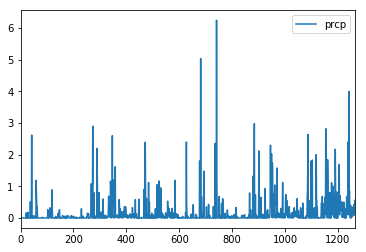

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [41]:
## Precipitation analysis
# from sqlalchemy import select, join
import matplotlib.pyplot as plt

from sqlalchemy import text, select

#* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.
start_date = "2017-04-01"
end_date = "2017-04-15"

# * Design a query to retrieve the last 12 months of precipitation data.
# * Select only the `date` and `prcp` values.
precipitation = select([Measurement.prcp, Measurement.date]).where(Measurement.date.like("%2017%")) 

# * Load the query results into a Pandas DataFrame and set the index to the date column.
precipitation_df = pd.read_sql_query(precipitation, engine)  

#* Plot the results using the DataFrame `plot` method.
precipitation_df.plot(kind="line")
plt.show()

#* Use Pandas to print the summary statistics for the precipitation data.
precipitation_df.describe()

In [43]:
# * Design a query to calculate the total number of stations.

# * Design a query to find the most active stations.

#   * List the stations and observation counts in descending order

#   * Which station has the highest number of observations?

# * Design a query to retrieve the last 12 months of temperature observation data (tobs).

#   * Filter by the station with the highest number of observations.

#   * Plot the results as a histogram with `bins=12`.

#   <center><img src='images/temp_hist.png' height="400px" /></center>


TypeError: 'DeclarativeMeta' object is not iterable

In [ ]:
#API Routes
app = Flask(__name__)
@app.route("/api/v1.0/precipitation")
def precipitation():
    return "precipitation"

@app.route("/api/v1.0/stations")
def stations():
    return "stations"

@app.route("/api/v1.0/tobs")
def tobs():
    return "tobs"

@app.route("/api/v1.0/<path:start>")
def tobsOnDate():
    return "tobs"

@app.route("/api/v1.0/<path:start>/<path:end>")
def tobsInDateRange():
    return "tobs"